<a href="https://colab.research.google.com/github/eisenblume7/car-prediction-germany/blob/main/UAS_avdteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Import dataset auto.csv pada dataframe dengan nama variabel df1

In [ ]:
df1 = pd.read_csv('autos.csv', encoding='cp1252')
df1.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21


Melihat kolom dataframe

In [ ]:
df1.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Memilih 10 fitur yang akan digunakan yaitu 'price', 'vehicleType', ‘age’,
'powerPS', 'model', 'kilometer', 'fuelType', 'brand', and
'notRepairedDamage', 'gearbox'

In [ ]:
# Memilih kolom
columns_to_select = ['name', 'price', 'vehicleType','gearbox', 'powerPS', 'model',
       'kilometer', 'fuelType', 'brand',
       'notRepairedDamage']

# Buat df2 dengan kolom yang dipilih
df2 = df1[columns_to_select]

# Tampilkan hasil untuk memastikan
df2.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480.0,NaN,manuell,0.0,golf,150000.0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300.0,coupe,manuell,190.0,NaN,125000.0,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800.0,suv,automatik,163.0,grand,125000.0,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500.0,kleinwagen,manuell,75.0,golf,150000.0,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600.0,kleinwagen,manuell,69.0,fabia,90000.0,diesel,skoda,nein


Preprocessing Data dengan melakukan check terhadap null value

In [ ]:
df2.isnull().sum()

,0
name,0
price,1
vehicleType,11487
gearbox,6138
powerPS,1
model,6249
kilometer,1
fuelType,10289
brand,1
notRepairedDamage,22102


Menghapus nilai null dan memfilter harga dan kilometer yang tidak valid

In [ ]:
df3 = df2.dropna()  # Hapus baris dengan nilai NA
df4 = df3[(df2['price'] > 0) & (df2['kilometer'] > 0)]

# Menghapus Outlier pada Price
Q1 = df4['price'].quantile(0.25)  # Kuartil pertama
Q3 = df4['price'].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data dalam rentang batas
df4 = df4[(df4['price'] >= lower_bound) & (df4['price'] <= upper_bound)]

<ipython-input-8-e089116dd270>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[(df2['price'] > 0) & (df2['kilometer'] > 0)]


Mengubah data kategorikal menjadi numerik

# EXPLORATORY DATA ANALYSIS (EDA)

Setelah data diproses terlebih dahulu, data tersebut dianalisis melalui eksplorasi visual untuk mengumpulkan wawasan tentang model yang dapat diterapkan pada data, memahami keragaman data, dan rentang setiap bidang. Kami menggunakan diagram batang, diagram kotak, grafik distribusi, dll. untuk mengeksplorasi variasi setiap fitur dan hubungannya dengan fitur lain termasuk fitur target.

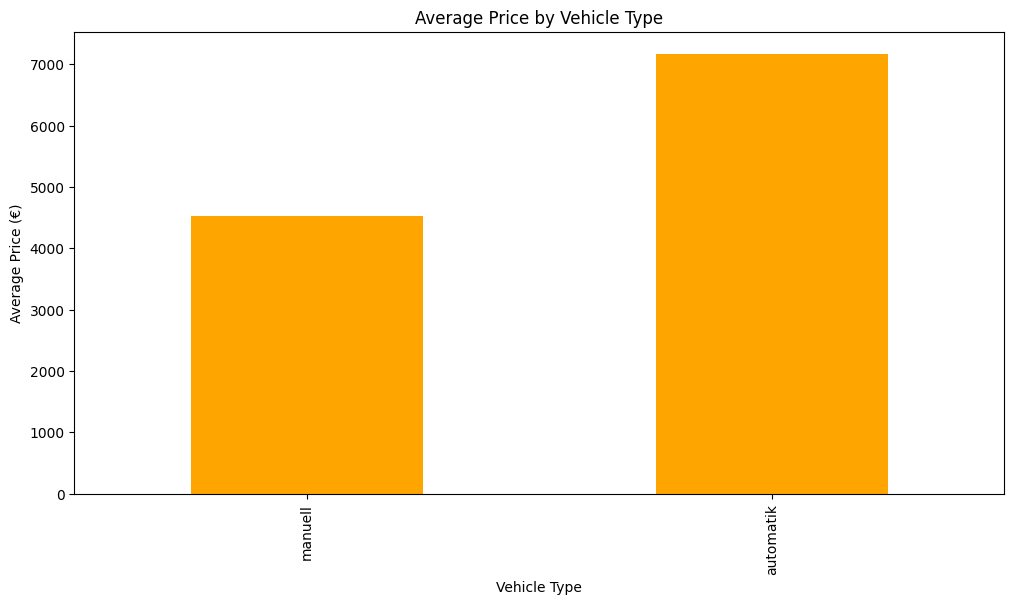

In [ ]:
avg_price_by_gear = df4.groupby('gearbox')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_price_by_gear.plot(kind='bar', color='orange')
plt.title('Average Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price (€)')
plt.show()


<ipython-input-60-a426f347560e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='notRepairedDamage', y='price', data=df4, palette='Set1')


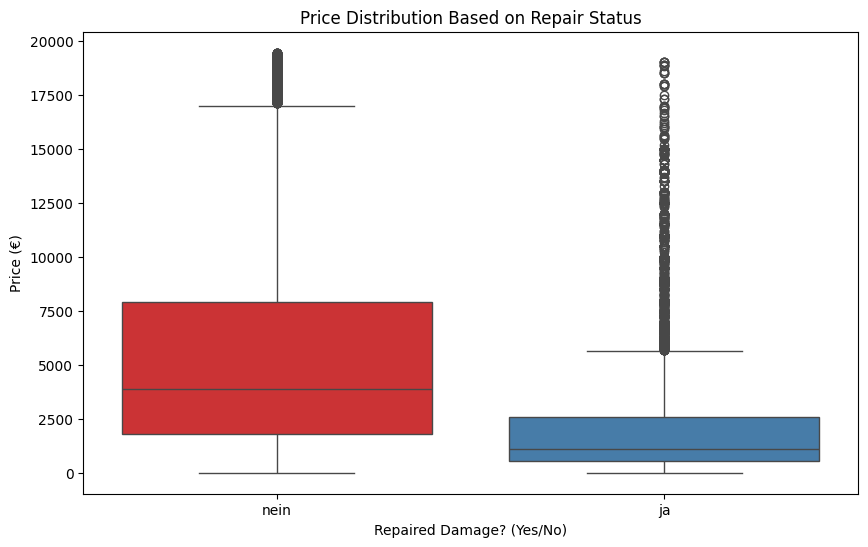

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='notRepairedDamage', y='price', data=df4, palette='Set1')
plt.title('Price Distribution Based on Repair Status')
plt.xlabel('Repaired Damage? (Yes/No)')
plt.ylabel('Price (€)')
plt.show()


<ipython-input-11-66ab09374530>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_vehicleType.index, y=avg_price_by_vehicleType.values, palette='Set3')


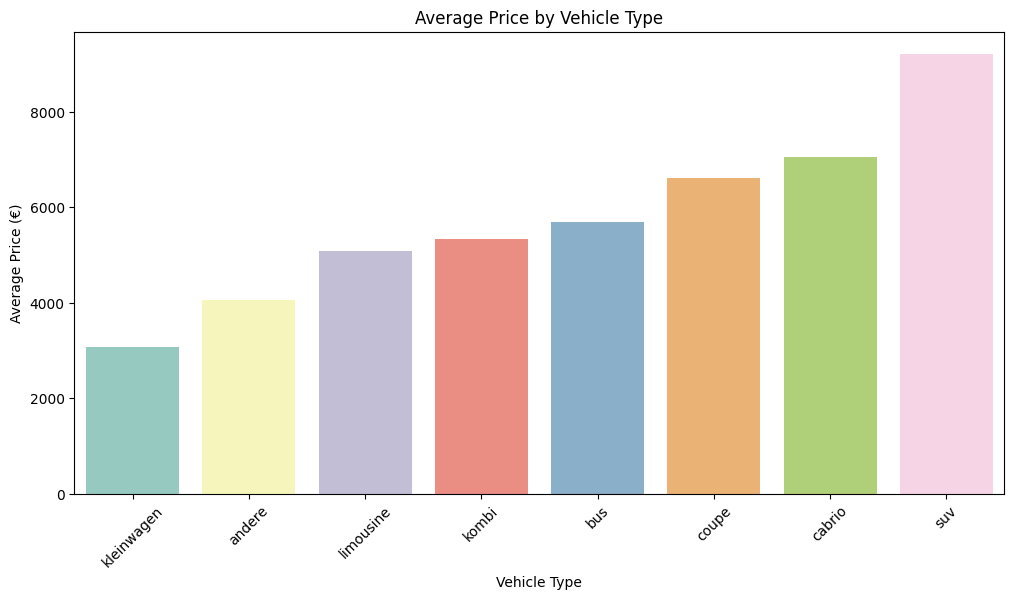

In [ ]:
avg_price_by_vehicleType = df4.groupby('vehicleType')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_vehicleType.index, y=avg_price_by_vehicleType.values, palette='Set3')
plt.title('Average Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-0ac875318917>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', y='fuelType', data=df4, palette='Set3')


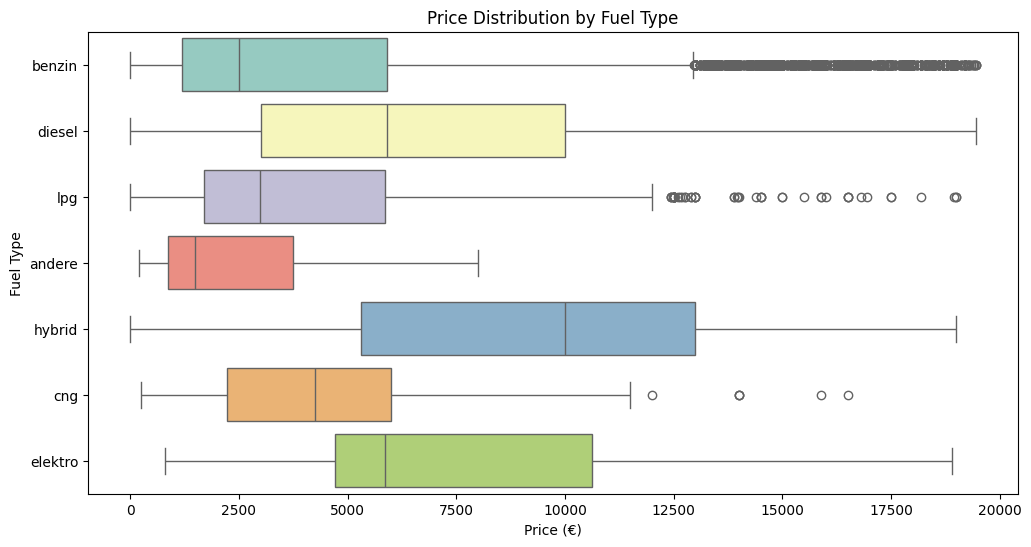

In [ ]:
# Menghitung rata-rata harga per jenis bahan bakar
avg_price_by_fuelType = df4.groupby('fuelType')['price'].mean().sort_values(ascending=False).reset_index()

# Membuat boxplot langsung dari data tanpa menghitung rata-rata
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='fuelType', data=df4, palette='Set3')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Price (€)')
plt.ylabel('Fuel Type')
plt.show()


<ipython-input-61-ca9188a7ba94>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='price', data=top_10_avg_price_by_brand, palette='Set3')


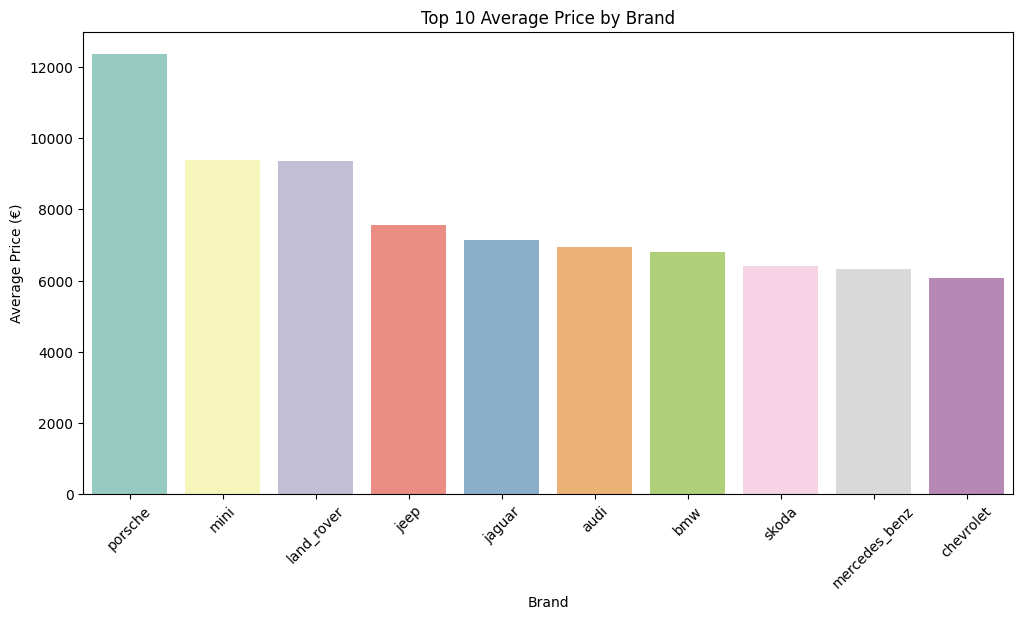

In [ ]:
# Menghitung rata-rata harga per merek
avg_price_by_brand = df4.groupby('brand')['price'].mean().sort_values(ascending=False).reset_index()

# Memilih 10 merek dengan harga rata-rata tertinggi
top_10_avg_price_by_brand = avg_price_by_brand.head(10)

# Membuat barplot untuk 10 merek teratas
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=top_10_avg_price_by_brand, palette='Set3')
plt.title('Top 10 Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45)
plt.show()


# Model Random Forest
Membuat model random forest untuk membuat prediction data, dengan split sebanayak 70% training, 20% test, 10% validation.

In [ ]:
# Menghapus kolom yang tidak relevan (seperti 'name' dan 'model')
df = df4.drop(['name', 'model'], axis=1)

# Mengonversi 'gearbox' menjadi variabel kategorikal numerik
df['gearbox'] = df['gearbox'].map({'manual': 1, 'automatic': 0})

# Mengonversi 'notRepairedDamage' menjadi variabel kategorikal numerik
df['notRepairedDamage'] = df['notRepairedDamage'].map({'yes': 1, 'no': 0})

# Simpan kolom asli untuk visualisasi nanti
df['brand_original'] = df['brand']
df['fuelType_original'] = df['fuelType']

# Konversi 'vehicleType', 'fuelType', dan 'brand' menjadi numerik dengan One-Hot Encoding
df = pd.get_dummies(df, columns=['vehicleType', 'fuelType', 'brand'], drop_first=True)

# Memeriksa dtypes setelah konversi
print(df.dtypes)



price                     float64
gearbox                   float64
powerPS                   float64
kilometer                 float64
notRepairedDamage         float64
brand_original             object
fuelType_original          object
vehicleType_bus              bool
vehicleType_cabrio           bool
vehicleType_coupe            bool
vehicleType_kleinwagen       bool
vehicleType_kombi            bool
vehicleType_limousine        bool
vehicleType_suv              bool
fuelType_benzin              bool
fuelType_cng                 bool
fuelType_diesel              bool
fuelType_elektro             bool
fuelType_hybrid              bool
fuelType_lpg                 bool
brand_audi                   bool
brand_bmw                    bool
brand_chevrolet              bool
brand_chrysler               bool
brand_citroen                bool
brand_dacia                  bool
brand_daewoo                 bool
brand_daihatsu               bool
brand_fiat                   bool
brand_ford    

In [ ]:
# Split Dataset (70% Training, 20% Testing, 10% Validation)
X = df.drop(['price', 'brand_original', 'fuelType_original'], axis=1)
y = df['price']

# Step 1: Split training (70%) dan temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split temp menjadi testing (20%) dan validation (10%)
# Dalam hal ini, X_temp dan y_temp akan dibagi menjadi 2/3 untuk testing dan 1/3 untuk validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Print ukuran dataset untuk verifikasi
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Validation set: {X_val.shape}")

Training set: (51570, 55)
Testing set: (14734, 55)
Validation set: (7368, 55)


Melatih model random forest

In [ ]:
# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

Evaluasi Model Random Forest menggunakan r square score. R square merupakan suatu nilai yang memperlihatkan seberapa besar variabel independen (eksogen) mempengaruhi variabel dependen (endogen). R squared merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen.


In [ ]:
# Evaluate Model on Training, Testing, and Validation Data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_val_pred = rf.predict(X_val)

# Evaluate Performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Training R²: {train_r2:.2f}")
print(f"Testing R²: {test_r2:.2f}")
print(f"Validation R²: {val_r2:.2f}")

Training R²: 0.85
Testing R²: 0.74
Validation R²: 0.74


R square training menunjukkan angka 0.85 atau 85% yang berati termasuk dalam kategori sangat kuat. R square testing dan validasi menujukkan angka 0.74 atau 74% yang berati termasuk dalam kategori sangat kuat

# Visualisasi Prediksi

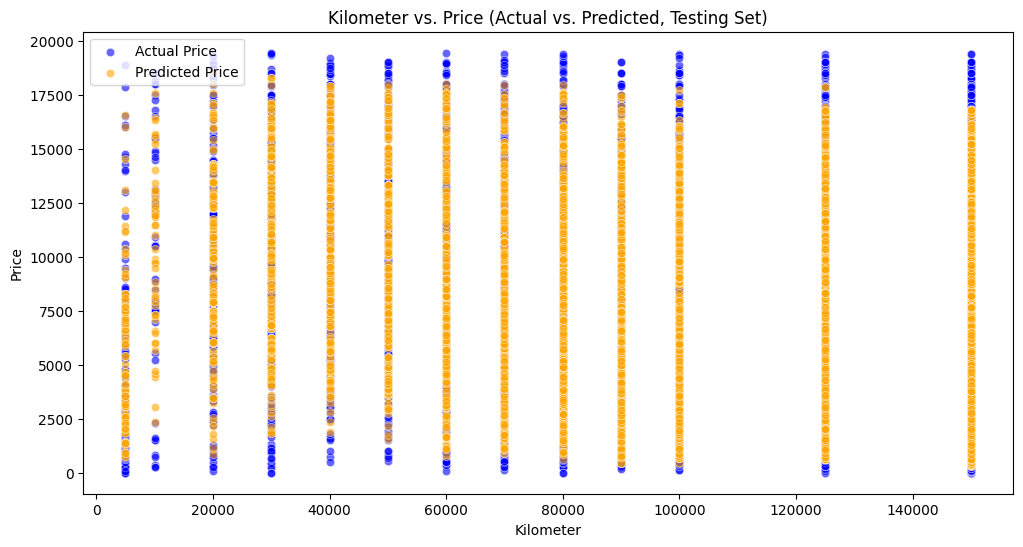

In [ ]:
X_test['actual_price'] = y_test
X_test['predicted_price'] = y_test_pred

#Scatter Plot: Kilometer vs Price (Actual vs Predicted, Testing Set)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='kilometer', y='actual_price', data=X_test, label='Actual Price', alpha=0.6, color='blue')
sns.scatterplot(x='kilometer', y='predicted_price', data=X_test, label='Predicted Price', alpha=0.6, color='orange')
plt.title('Kilometer vs. Price (Actual vs. Predicted, Testing Set)')
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.legend()
plt.show()

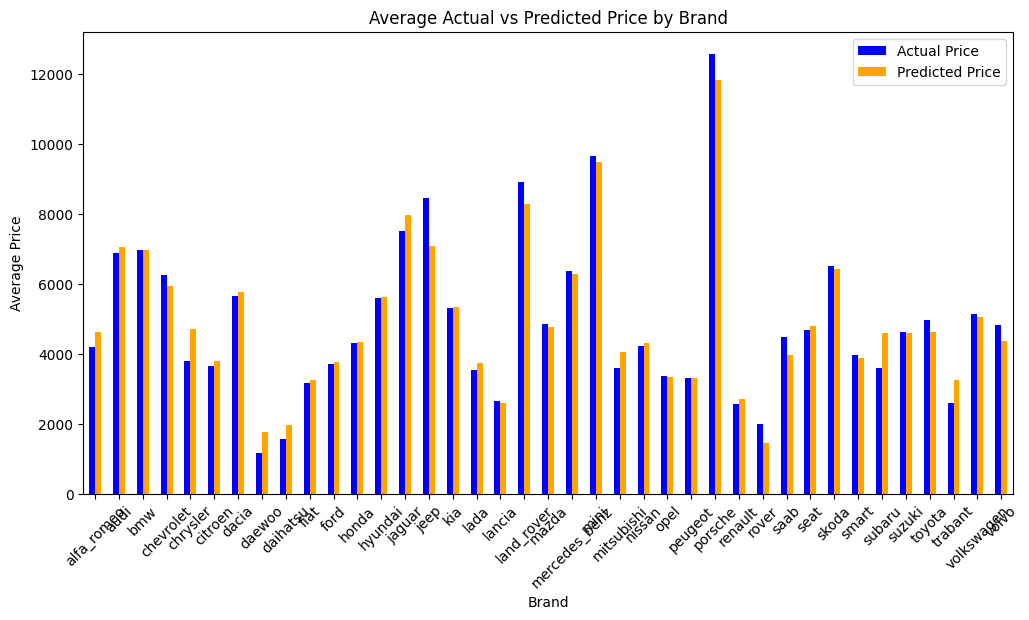

In [ ]:
X_test['actual_price'] = y_test
X_test['predicted_price'] = y_test_pred
X_test['brand_original'] = y_test.index.map(lambda idx: df.loc[idx, 'brand_original'])

# Visualisasi 2: Bar Chart - Rata-rata Harga Prediksi vs. Aktual per Brand
brand_avg = X_test.groupby('brand_original')[['actual_price', 'predicted_price']].mean()
brand_avg.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])
plt.title('Average Actual vs Predicted Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(['Actual Price', 'Predicted Price'])
plt.show()

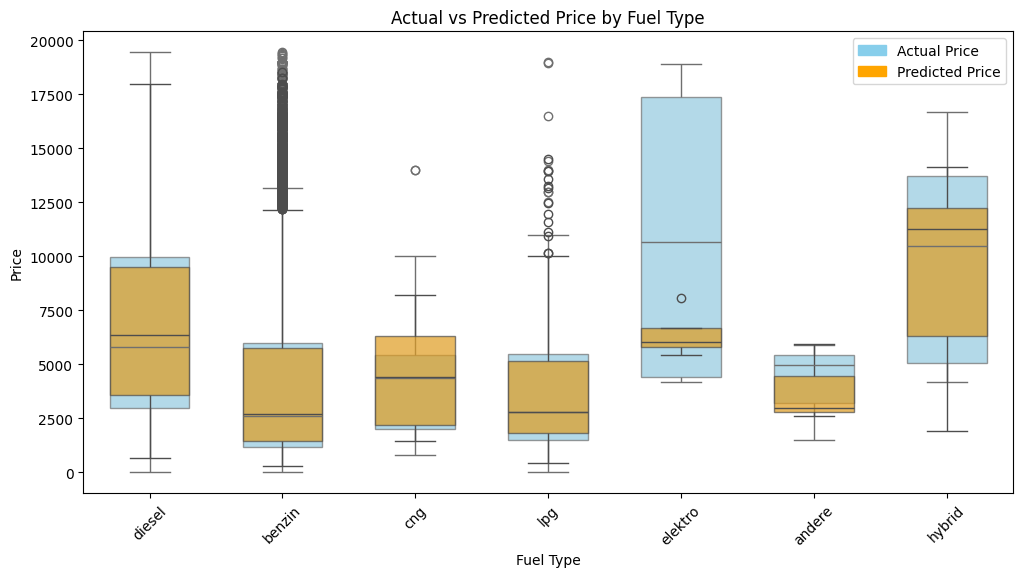

In [ ]:
from matplotlib.patches import Patch

X_test['actual_price'] = y_test
X_test['predicted_price'] = y_test_pred
X_test['fuelType_original'] = y_test.index.map(lambda idx: df.loc[idx, 'fuelType_original'])

# Box Plot: Actual vs Predicted Price by Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuelType_original', y='actual_price', data=X_test, color='skyblue', width=0.6, boxprops=dict(alpha=0.7))
sns.boxplot(x='fuelType_original', y='predicted_price', data=X_test, color='orange', width=0.6, boxprops=dict(alpha=0.7))
plt.title('Actual vs Predicted Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(['Actual Price', 'Predicted Price'])

# Create custom legend
legend_labels = [Patch(color='skyblue', label='Actual Price'), Patch(color='orange', label='Predicted Price')]
plt.legend(handles=legend_labels)

plt.show()
